# WHAT IS THIS NOTEBOOK ABOUT?

This notebook serves to test all the functions related to continuous variable forecast

### Contents
1. [Prophet](#PROPHET)
2. [LSTM](#LSTM)

The initial data can be retrieved from the folder in the share point. The data is the same that is to come from the previous task in the KubeFlow Pipeline.

# IMPORTS

In [1]:
import pandas as pd
from prophet import Prophet

In [20]:

data = pd.read_feather("test_data.feather")

# PROPHET

In [21]:
def Train_Prophet(train_data, num_days, measures_per_hour, diff_time):

    m = Prophet(daily_seasonality=True, weekly_seasonality=True, changepoint_prior_scale = 0.05)
    m.fit(train_data)
    future = m.make_future_dataframe(periods= 24*(2 + num_days)*measures_per_hour , freq="{minutes}T".format(minutes = diff_time))
    forecast = m.predict(future)

    forecast_test = forecast["yhat"].tolist()[-24*measures_per_hour*(2 + num_days):-24*measures_per_hour]

    return forecast, forecast_test, m

In [22]:
forecast, forecast_test, model = Train_Prophet(data, 1, 1, 60)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/fablab/opt/anaconda3/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/fablab/opt/anaconda3/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/fablab/opt/anaconda3/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [23]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5539,2023-04-05 19:45:00,6.332772,3.818716,10.747463,6.332771,6.332773,0.735757,0.735757,0.735757,0.813784,0.813784,0.813784,-0.078027,-0.078027,-0.078027,0.0,0.0,0.0,7.068530
5540,2023-04-05 20:45:00,6.332792,3.360990,10.175205,6.332791,6.332793,0.515492,0.515492,0.515492,0.592434,0.592434,0.592434,-0.076942,-0.076942,-0.076942,0.0,0.0,0.0,6.848284
5541,2023-04-05 21:45:00,6.332811,3.231708,9.597741,6.332810,6.332812,0.107157,0.107157,0.107157,0.182711,0.182711,0.182711,-0.075554,-0.075554,-0.075554,0.0,0.0,0.0,6.439968
5542,2023-04-05 22:45:00,6.332830,2.678106,9.031908,6.332829,6.332831,-0.412355,-0.412355,-0.412355,-0.338450,-0.338450,-0.338450,-0.073905,-0.073905,-0.073905,0.0,0.0,0.0,5.920475
5543,2023-04-05 23:45:00,6.332849,2.147274,9.003253,6.332848,6.332851,-0.920091,-0.920091,-0.920091,-0.848053,-0.848053,-0.848053,-0.072038,-0.072038,-0.072038,0.0,0.0,0.0,5.412759


/Users/fablab/opt/anaconda3/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/fablab/opt/anaconda3/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


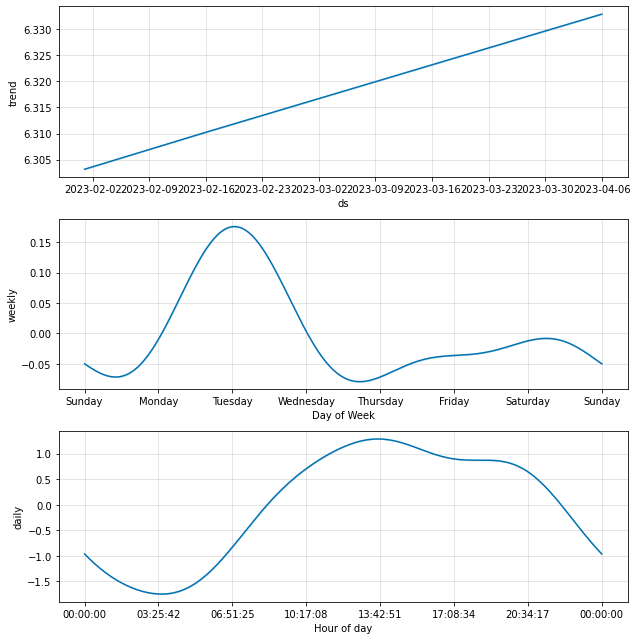

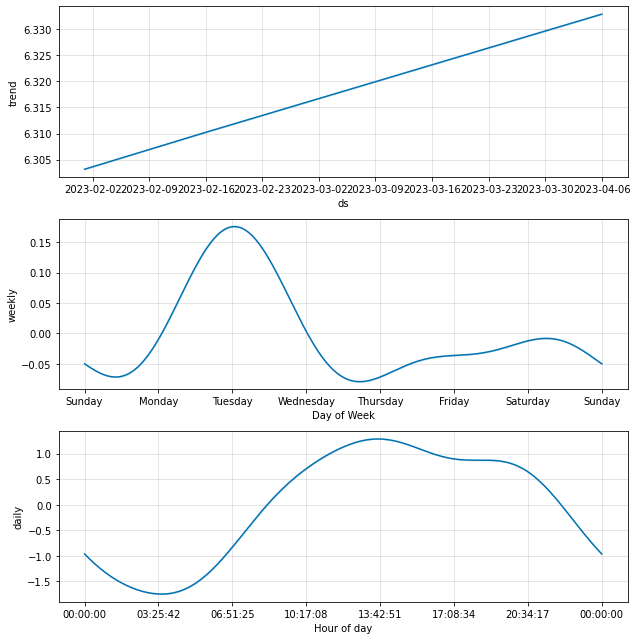

In [24]:
model.plot_components(forecast)

# LSTM